In [8]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
listings_source = pd.read_csv('../data/raw/simulated_listings.csv')

In [4]:
listings = listings_source.copy()
train, test = train_test_split(listings,train_size=0.8)

In [10]:
# coords = np.vstack((train[['latitude', 'longitude']].values,
#                     test[['latitude', 'longitude']].values))

# sample_ind = np.random.permutation(len(coords))[:500000]
# kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

# train.loc[:, 'cluster'] = kmeans.predict(train[['latitude', 'longitude']])
# test.loc[:, 'cluster'] = kmeans.predict(test[['latitude', 'longitude']])

# listings.loc[:, 'cluster'] = kmeans.predict(listings[['latitude', 'longitude']])

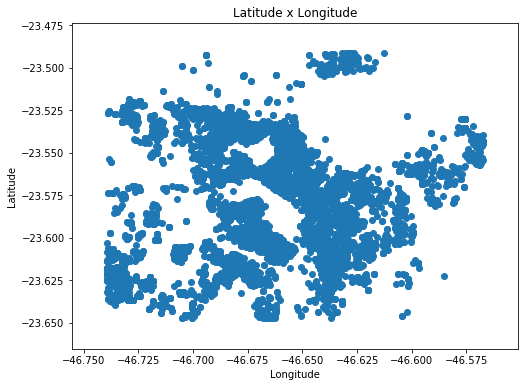

In [15]:
# df = listings.copy()
# location = df.copy()

# columns_to_keep = ['latitude', 'longitude']

# for col in location:
#     if col not in columns_to_keep:
#         location = location.drop(col, 1)

# location['lng_parsed'] = pd.to_numeric(location['longitude'], errors='coerce')
# location['lat_parsed'] = pd.to_numeric(location['latitude'], errors='coerce')

# location = location.drop('longitude', 1)
# location = location.drop('latitude', 1)

# # Remove Outliers do dataframe
# location = location[((location.lat_parsed - location.lat_parsed.mean()) / location.lat_parsed.std()).abs() < 3]
# location = location[((location.lng_parsed - location.lng_parsed.mean()) / location.lng_parsed.std()).abs() < 3]
# location = location[np.abs(location.lat_parsed-location.lat_parsed.mean()) <= (3*location.lat_parsed.std())]
# location = location[np.abs(location.lng_parsed-location.lng_parsed.mean()) <= (3*location.lng_parsed.std())]

# for i in range(0, len(df)):
#     if i not in location.index:
#         df = df[df.index != i]

# df = df.reset_index(drop=True)

# x1 = location.lng_parsed
# x2 = location.lat_parsed

# # Plot charts and execute Kmeans clustering
# plt.figure(num=None, figsize=(8, 6), facecolor='w', edgecolor='k')
# plt.title('Latitude x Longitude')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.scatter(x1, x2)
# plt.show()

In [10]:
# Create cluster using Kmeans
def find_cluster(df):

    location = df.copy()

    columns_to_keep = ['latitude', 'longitude']

    for col in location:
        if col not in columns_to_keep:
            location = location.drop(col, 1)
    
    location['lng_parsed'] = pd.to_numeric(location['longitude'], errors='coerce')
    location['lat_parsed'] = pd.to_numeric(location['latitude'], errors='coerce')
    
    location = location.drop('longitude', 1)
    location = location.drop('latitude', 1)

    # Remove Outliers do dataframe
    location = location[((location.lat_parsed - location.lat_parsed.mean()) / location.lat_parsed.std()).abs() < 3]
    location = location[((location.lng_parsed - location.lng_parsed.mean()) / location.lng_parsed.std()).abs() < 3]
    location = location[np.abs(location.lat_parsed-location.lat_parsed.mean()) <= (3*location.lat_parsed.std())]
    location = location[np.abs(location.lng_parsed-location.lng_parsed.mean()) <= (3*location.lng_parsed.std())]

    for i in range(0, len(df)):
        if i not in location.index:
            df = df[df.index != i]

    df = df.reset_index(drop=True)

    x1 = location.lng_parsed
    x2 = location.lat_parsed
    
    # Plot charts and execute Kmeans clustering
    plt.figure(num=None, figsize=(8, 6), facecolor='w', edgecolor='k')
    plt.title('Latitude x Longitude')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.scatter(x1, x2)
    plt.show()

    
    plt.figure(num=None, figsize=(8, 6), facecolor='w', edgecolor='k')
    plt.scatter(location.lng_parsed, location.lat_parsed)
    plt.title('Clustering neighborhoods')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    location_full = location

    location_np = np.array(location)

    # Execute Kmeans clustering
    # São Paulo has approximately 100 neighborhoods
    k = 100 # Define the value of k
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(location_np)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    for i in range(k):
        # select only data observations with cluster label == i
        ds = location_np[np.where(labels==i)]
        # plot the data observations
        plt.plot(ds[:,0],ds[:,1],'o', markersize=6)
        # plot the centroids
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        plt.setp(lines,ms=8.0)
        plt.setp(lines,mew=3.0)
    plt.show()

    list_areas_kmeans = []
    for f, b in zip(labels, location_full.index):
        list_areas_kmeans.append(f)

    return list_areas_kmeans, df, location

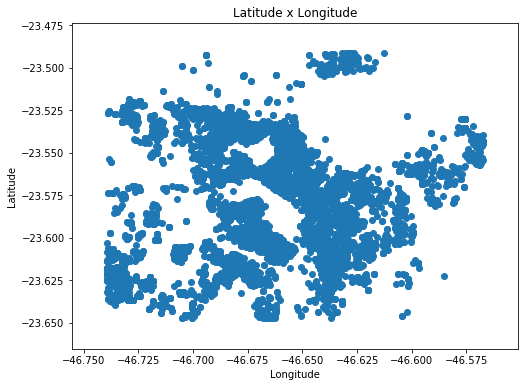

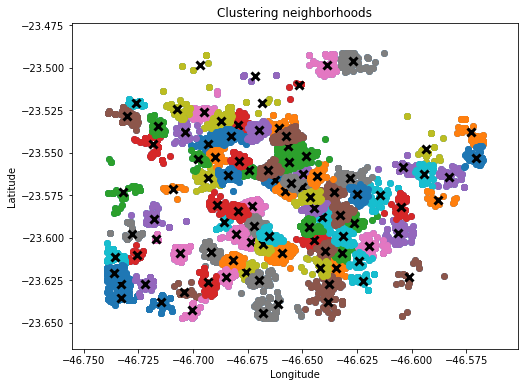

In [11]:
df = listings.copy()
list_areas_kmeans, df, location = find_cluster(df)

df['area_kmeans'] = list_areas_kmeans

In [18]:
df[df.latitude == df.latitude.min()]

rooms  garages  useful_area   latitude  longitude   value  \
2857    3.0      2.0          100 -23.647398 -46.663721  808492   

      interior_quality  time_on_market  sold  area_kmeans  
2857                 1        6.492741     0           17

In [19]:
df[df.latitude == df.latitude.max()]

rooms  garages  useful_area   latitude  longitude    value  \
23    4.0      3.0          226 -23.491429 -46.631757  2037780   

    interior_quality  time_on_market  sold  area_kmeans  
23                 1           121.0     1            7